In [53]:
#Import libraries
import numpy as np
import pandas as pd
import pickle
from sklearn.datasets import fetch_california_housing
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# !pip install geopy
from geopy.geocoders import Nominatim

In [54]:
# Load the dataset
print("🔄 Loading California Housing dataset...")
housing = fetch_california_housing(as_frame=True)
df = housing.frame

🔄 Loading California Housing dataset...


In [55]:
print(df.head())
print("-----------------------------------")
print(df.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
-----------------------------------
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900    

In [56]:
# Features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [59]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the model
# print("📈 Training Linear Regression model...")
# model = LinearRegression()
# model.fit(X_train, y_train)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"✅ Model Trained. R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"📉 Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")

# Save the model
pickle.dump(model, open('house_price_model.pkl', 'wb'))
print("💾 Model saved to 'house_price_model.pkl'")

# Load the model
loaded_model = pickle.load(open('house_price_model.pkl', 'rb'))

print("🏠 California House Price Prediction")
location_input = input("Enter Location (e.g., San Jose, CA): ")
# Check location exists or not
geolocator = Nominatim(user_agent="house-price-colab")
location = geolocator.geocode(location_input)
if not location:
    print(f"Location '{location_input}' not found. Please enter a valid location.")
    exit()

income = float(input("Enter median income (e.g., 3.5): "))
house_age = float(input("Enter average house age (e.g., 25): "))
avg_rooms = float(input("Enter average number of rooms (e.g., 6.0): "))
avg_bedrooms = float(input("Enter average number of bedrooms (e.g., 1.0): "))
population = float(input("Enter population (e.g., 1500): "))
avg_occupants = float(input("Enter average occupants per household (e.g., 3.0): "))

# Convert location to latitude and longitude
print(location)
latitude = location.latitude
longitude = location.longitude
print(f"Coordinates found: Latitude = {latitude:.2f}, Longitude = {longitude:.2f}")
# Make prediction
features = pd.DataFrame([{
    'MedInc': income,
    'HouseAge': house_age,
    'AveRooms': avg_rooms,
    'AveBedrms': avg_bedrooms,
    'Population': population,
    'AveOccup': avg_occupants,
    'Latitude': latitude,
    'Longitude': longitude
}])

predicted_price = loaded_model.predict(features)[0]

#Display result
print(f"\n🏠 Predicted Median House Price: ${predicted_price * 100000:.2f}")

✅ Model Trained. R² Score: 0.8051
📉 Mean Squared Error: 0.2554
💾 Model saved to 'house_price_model.pkl'
🏠 California House Price Prediction
Enter Location (e.g., San Jose, CA): Cupertino, CA
Enter median income (e.g., 3.5): 3.5
Enter average house age (e.g., 25): 30
Enter average number of rooms (e.g., 6.0): 5
Enter average number of bedrooms (e.g., 1.0): 3
Enter population (e.g., 1500): 15000
Enter average occupants per household (e.g., 3.0): 5
Cupertino, Santa Clara County, California, 95014, United States
Coordinates found: Latitude = 37.32, Longitude = -122.03

🏠 Predicted Median House Price: $175362.00


In [60]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


📊 Model Evaluation:
Mean Squared Error (MSE): 0.2554
R² Score: 0.8051


/tmp/ipython-input-61-1288951713.py:10: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


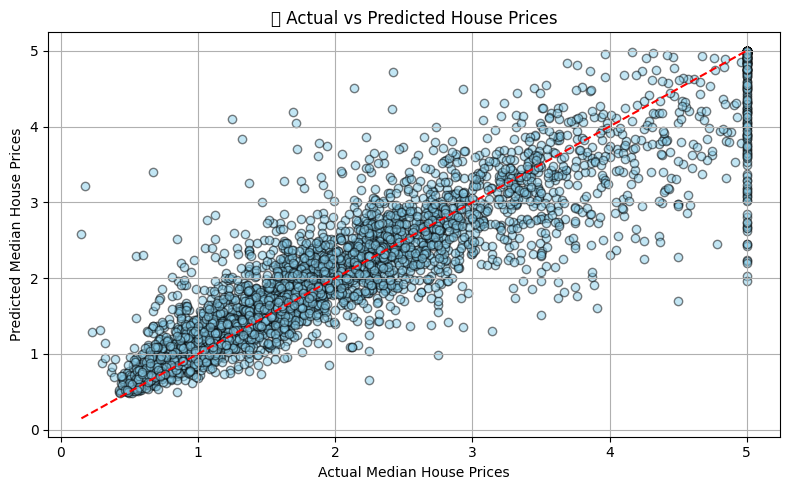

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='skyblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal prediction line
plt.xlabel("Actual Median House Prices")
plt.ylabel("Predicted Median House Prices")
plt.title("📉 Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
comparison_df = pd.DataFrame({
    'Actual Price ($100k)': y_test[:10].values.round(2),
    'Predicted Price ($100k)': y_pred[:10].round(2)
})
print("\n🔍 Sample Predictions vs Actuals:")
print(comparison_df)



🔍 Sample Predictions vs Actuals:
   Actual Price ($100k)  Predicted Price ($100k)
0                  0.48                     0.51
1                  0.46                     0.74
2                  5.00                     4.92
3                  2.19                     2.53
4                  2.78                     2.27
5                  1.59                     1.65
6                  1.98                     2.38
7                  1.58                     1.67
8                  3.40                     2.77
9                  4.47                     4.91
